# Makoto Kitamura

## Research question/interests: How does the halftime score affect the result and excitement of the whole game? How many scores in difference are enough to guarantee 80% winning at half score? How does a score of the home game change the excitement of the fans and does having higher excitement affect even more goals for the home team? What other strong factors are contributing to the team winning the game?

I will check the correlation between the halftime score and the result of the game and the excitement of the game and the result of the game. I will go through all the games and check the half score and what percentage of the game ended up being drawn or not.I believe that the pass success% is a stronger factor than the shots taken because I think a successful pass leads to the goal, not the number of shots taken . Another strong factor can be ball possession%. Also, I will do a regression model to see what actually leads the team to win

## EDA on my datset (Milestone 3, Task1)

In [3]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [4]:
#read dataset
df = pd.read_csv("../../Group14/data/raw/archive/matchesall2014-2020.csv")

In [5]:
df

,Unnamed: 0,Home Team,Away Team,Score,Half Time Score,Match Excitement,Home Team Rating,Away Team Rating,Home Team Possession %,Away Team Possession %,...,Away Team Clearances,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year
0,0,MAN UTD,SWANSEA,1-2,0-1,5.9,5.6,7.6,60,40,...,35.0,20.0,4.0,0.0,0.0,1,2,2,1,2014
1,1,WEST BROM,SUNDERLAND,2-2,1-1,7.3,6.5,7.4,58,42,...,42.0,9.0,1.0,0.0,0.0,2,2,2,2,2014
2,2,LEICESTER CITY,EVERTON,2-2,1-2,7.0,6.5,6.3,37,63,...,28.0,10.0,1.0,0.0,0.0,2,2,2,2,2014
3,3,WEST HAM,TOTTENHAM,0-1,0-0,4.8,5.9,6.4,47,53,...,27.0,10.0,0.0,0.0,1.0,0,1,1,0,2014
4,4,QPR,HULL CITY,0-1,0-0,3.8,5.7,6.6,51,49,...,56.0,10.0,2.0,0.0,0.0,0,1,1,0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2655,2655,ARSENAL,BRIGHTON,2-0,0-0,4.5,7.3,5.5,54,46,...,18.0,8.0,0.0,0.0,0.0,2,0,0,2,2020
2656,2656,SHEFFIELD UTD,BURNLEY,1-0,1-0,3.6,6.2,5.8,43,57,...,19.0,1.0,1.0,0.0,0.0,1,0,0,1,2020
2657,2657,LEICESTER CITY,TOTTENHAM,2-4,1-1,8.7,6.0,6.7,47,53,...,13.0,8.0,2.0,0.0,0.0,2,4,4,2,2020
2658,2658,WEST HAM,SOUTHAMPTON,3-0,2-0,5.8,7.3,5.2,37,63,...,9.0,9.0,3.0,0.0,0.0,3,0,0,3,2020


In [6]:
#showing all columns so we can pick the one we use
df.columns

Index(['Unnamed: 0', 'Home Team', 'Away Team', 'Score', 'Half Time Score',
       'Match Excitement', 'Home Team Rating', 'Away Team Rating',
       'Home Team Possession %', 'Away Team Possession %',
       'Home Team Off Target Shots', 'Home Team On Target Shots',
       'Home Team Total Shots', 'Home Team Blocked Shots', 'Home Team Corners',
       'Home Team Throw Ins', 'Home Team Pass Success %',
       'Home Team Aerials Won', 'Home Team Clearances', 'Home Team Fouls',
       'Home Team Yellow Cards', 'Home Team Second Yellow Cards',
       'Home Team Red Cards', 'Away Team Off Target Shots',
       'Away Team On Target Shots', 'Away Team Total Shots',
       'Away Team Blocked Shots', 'Away Team Corners', 'Away Team Throw Ins',
       'Away Team Pass Success %', 'Away Team Aerials Won',
       'Away Team Clearances', 'Away Team Fouls', 'Away Team Yellow Cards',
       'Away Team Second Yellow Cards', 'Away Team Red Cards',
       'Home Team Goals Scored', 'Away Team Goals Scored

In [7]:
#new dataset with relavant columns
df_subset= df[["Home Team", "Away Team", "Score", "Half Time Score", 'Match Excitement',
               'Home Team Rating', 'Away Team Rating', 'Home Team Possession %', 'Away Team Possession %', 
               'Home Team Total Shots', 'Away Team Total Shots',  'Home Team Pass Success %','Away Team Pass Success %', 
               'Home Team Fouls','Home Team Yellow Cards', 'Home Team Second Yellow Cards','Home Team Red Cards',
               'Away Team Fouls', 'Away Team Yellow Cards', 'Away Team Second Yellow Cards', 'Away Team Red Cards',
               'Home Team Goals Scored', 'Away Team Goals Scored', 'year']]

In [8]:
#create new columns so that we can answer research questions
df_subset["possession% ratio"]= df_subset['Home Team Possession %']/df_subset['Away Team Possession %']
df_subset["result score ratio"]= df_subset['Home Team Goals Scored']/df_subset['Away Team Goals Scored']
#dropping Null values
df_subset= df_subset.dropna()
df_subset

<ipython-input-8-f7257914ff37>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset["possession% ratio"]= df_subset['Home Team Possession %']/df_subset['Away Team Possession %']
<ipython-input-8-f7257914ff37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset["result score ratio"]= df_subset['Home Team Goals Scored']/df_subset['Away Team Goals Scored']


,Home Team,Away Team,Score,Half Time Score,Match Excitement,Home Team Rating,Away Team Rating,Home Team Possession %,Away Team Possession %,Home Team Total Shots,...,Home Team Red Cards,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,year,possession% ratio,result score ratio
0,MAN UTD,SWANSEA,1-2,0-1,5.9,5.6,7.6,60,40,14.0,...,0.0,20.0,4.0,0.0,0.0,1,2,2014,1.500000,0.5
1,WEST BROM,SUNDERLAND,2-2,1-1,7.3,6.5,7.4,58,42,10.0,...,0.0,9.0,1.0,0.0,0.0,2,2,2014,1.380952,1.0
2,LEICESTER CITY,EVERTON,2-2,1-2,7.0,6.5,6.3,37,63,11.0,...,0.0,10.0,1.0,0.0,0.0,2,2,2014,0.587302,1.0
3,WEST HAM,TOTTENHAM,0-1,0-0,4.8,5.9,6.4,47,53,18.0,...,0.0,10.0,0.0,0.0,1.0,0,1,2014,0.886792,0.0
4,QPR,HULL CITY,0-1,0-0,3.8,5.7,6.6,51,49,19.0,...,0.0,10.0,2.0,0.0,0.0,0,1,2014,1.040816,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2655,ARSENAL,BRIGHTON,2-0,0-0,4.5,7.3,5.5,54,46,16.0,...,0.0,8.0,0.0,0.0,0.0,2,0,2020,1.173913,inf
2656,SHEFFIELD UTD,BURNLEY,1-0,1-0,3.6,6.2,5.8,43,57,12.0,...,0.0,1.0,1.0,0.0,0.0,1,0,2020,0.754386,inf
2657,LEICESTER CITY,TOTTENHAM,2-4,1-1,8.7,6.0,6.7,47,53,10.0,...,0.0,8.0,2.0,0.0,0.0,2,4,2020,0.886792,0.5
2658,WEST HAM,SOUTHAMPTON,3-0,2-0,5.8,7.3,5.2,37,63,14.0,...,0.0,9.0,3.0,0.0,0.0,3,0,2020,0.587302,inf


In [9]:
#setting theme to darkgrid
sns.set_theme(style="darkgrid")

Text(0.5, 1.0, 'Relationship between Half Time Score and Match Excitement')

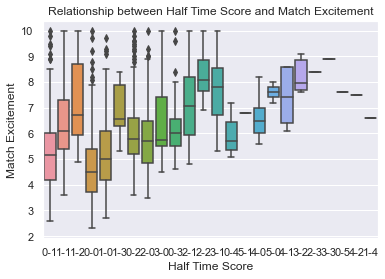

In [10]:
sns.boxplot(x="Half Time Score" ,y='Match Excitement', data=df_subset)
plt.title("Relationship between Half Time Score and Match Excitement")

Text(0.5, 1.0, 'Relationship  between the score at the end and Match Excitement')

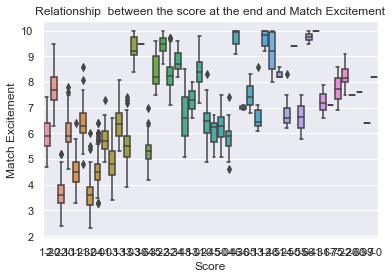

In [11]:
# how does the half time score affect the results of the game
#sns.boxplot(x="Half Time Score" ,y='Score', data=df_subset)
#couldn't do this because both of the data were't numerical
sns.boxplot(x='Score' ,y='Match Excitement', data=df_subset)
plt.title("Relationship  between the score at the end and Match Excitement")

C:\Anaconda\lib\site-packages\numpy\lib\function_base.py:3964: RuntimeWarning: invalid value encountered in subtract
  subtract(b, diff_b_a * (1 - t), out=lerp_interpolation, where=t>=0.5)
C:\Anaconda\lib\site-packages\numpy\lib\function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Anaconda\lib\site-packages\numpy\lib\function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Anaconda\lib\site-packages\numpy\lib\function_base.py:3964: RuntimeWarning: invalid value encountered in subtract
  subtract(b, diff_b_a * (1 - t), out=lerp_interpolation, where=t>=0.5)
C:\Anaconda\lib\site-packages\numpy\lib\function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Anaconda\lib\site-packages\numpy\lib\function_base.py:3964: RuntimeWarning: invalid value encountered in subtract
  subtract(b, diff_b_a * (1 - t), out=lerp_interpolation, where=t>=0.5

Text(0.5, 1.0, 'Relationship between the possession% ration and result score ratio')

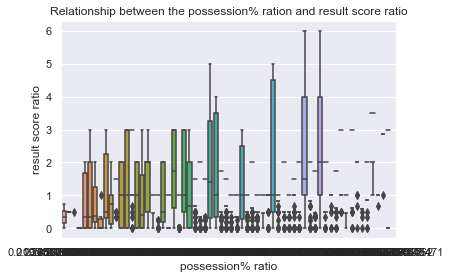

In [12]:
sns.boxplot(x='possession% ratio' ,y='result score ratio', data=df_subset)
plt.title("Relationship between the possession% ration and result score ratio")

when away team only score zero, the result score becomes infinite. 
possession % has a lot of decimal points



I am not sure how to turn the half score data into separate numerical data for home and away

if I could do that, I can find the differemce of the score at the half time and compare if the team which had the advantage 
at the half time, win, then list the difference of the score(1,2,...) and get the probability of the team winning 
and we would get the probality of the adavantaged team winning by the difference at half time score
this indicates how important it is to score first and get the advantage of the game.
Also I need win/lose/draw column.

## Refining my research Questions Task 2

I think my research question is pretty good, but I am not sure if we have the python function to find those out. 
It might be better to phrase is half time score good predictor of the result score at the end? How accurate is that?
Next milestone, I will check correlation of all factors that are contributing the team to win and have a better understanding of the momentum of the game.

# Milestone4 - Data Analysis Pipeline.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
df = pd.read_csv("../../Group14/data/raw/archive/matchesall2014-2020.csv")
df_subset = df[["Home Team", "Away Team", "Score", "Half Time Score", 'Match Excitement',
               'Home Team Rating', 'Away Team Rating', 'Home Team Possession %', 'Away Team Possession %', 
               'Home Team Total Shots', 'Away Team Total Shots',  'Home Team Pass Success %','Away Team Pass Success %', 
               'Home Team Fouls','Home Team Yellow Cards', 'Home Team Second Yellow Cards','Home Team Red Cards',
               'Away Team Fouls', 'Away Team Yellow Cards', 'Away Team Second Yellow Cards', 'Away Team Red Cards',
               'Home Team Goals Scored', 'Away Team Goals Scored', 'year']]
df_subset = df_subset.dropna()
df_subset
# load dataframe from the website
# choosing only relevant columns

# Dropping N/A values

,Home Team,Away Team,Score,Half Time Score,Match Excitement,Home Team Rating,Away Team Rating,Home Team Possession %,Away Team Possession %,Home Team Total Shots,...,Home Team Yellow Cards,Home Team Second Yellow Cards,Home Team Red Cards,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,year
0,MAN UTD,SWANSEA,1-2,0-1,5.9,5.6,7.6,60,40,14.0,...,2.0,0.0,0.0,20.0,4.0,0.0,0.0,1,2,2014
1,WEST BROM,SUNDERLAND,2-2,1-1,7.3,6.5,7.4,58,42,10.0,...,3.0,0.0,0.0,9.0,1.0,0.0,0.0,2,2,2014
2,LEICESTER CITY,EVERTON,2-2,1-2,7.0,6.5,6.3,37,63,11.0,...,1.0,0.0,0.0,10.0,1.0,0.0,0.0,2,2,2014
3,WEST HAM,TOTTENHAM,0-1,0-0,4.8,5.9,6.4,47,53,18.0,...,2.0,1.0,0.0,10.0,0.0,0.0,1.0,0,1,2014
4,QPR,HULL CITY,0-1,0-0,3.8,5.7,6.6,51,49,19.0,...,1.0,0.0,0.0,10.0,2.0,0.0,0.0,0,1,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2655,ARSENAL,BRIGHTON,2-0,0-0,4.5,7.3,5.5,54,46,16.0,...,0.0,0.0,0.0,8.0,0.0,0.0,0.0,2,0,2020
2656,SHEFFIELD UTD,BURNLEY,1-0,1-0,3.6,6.2,5.8,43,57,12.0,...,3.0,0.0,0.0,1.0,1.0,0.0,0.0,1,0,2020
2657,LEICESTER CITY,TOTTENHAM,2-4,1-1,8.7,6.0,6.7,47,53,10.0,...,0.0,0.0,0.0,8.0,2.0,0.0,0.0,2,4,2020
2658,WEST HAM,SOUTHAMPTON,3-0,2-0,5.8,7.3,5.2,37,63,14.0,...,0.0,0.0,0.0,9.0,3.0,0.0,0.0,3,0,2020


## Process data and wrangle data/ data cleaning

In [14]:
#create new columns so that we can answer research questions
df_subset["possession_ratio"]= df_subset['Home Team Possession %']/df_subset['Away Team Possession %']
df_subset["result_score_ratio"]= df_subset['Home Team Goals Scored']/df_subset['Away Team Goals Scored']
df_subset

,Home Team,Away Team,Score,Half Time Score,Match Excitement,Home Team Rating,Away Team Rating,Home Team Possession %,Away Team Possession %,Home Team Total Shots,...,Home Team Red Cards,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,year,possession_ratio,result_score_ratio
0,MAN UTD,SWANSEA,1-2,0-1,5.9,5.6,7.6,60,40,14.0,...,0.0,20.0,4.0,0.0,0.0,1,2,2014,1.500000,0.5
1,WEST BROM,SUNDERLAND,2-2,1-1,7.3,6.5,7.4,58,42,10.0,...,0.0,9.0,1.0,0.0,0.0,2,2,2014,1.380952,1.0
2,LEICESTER CITY,EVERTON,2-2,1-2,7.0,6.5,6.3,37,63,11.0,...,0.0,10.0,1.0,0.0,0.0,2,2,2014,0.587302,1.0
3,WEST HAM,TOTTENHAM,0-1,0-0,4.8,5.9,6.4,47,53,18.0,...,0.0,10.0,0.0,0.0,1.0,0,1,2014,0.886792,0.0
4,QPR,HULL CITY,0-1,0-0,3.8,5.7,6.6,51,49,19.0,...,0.0,10.0,2.0,0.0,0.0,0,1,2014,1.040816,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2655,ARSENAL,BRIGHTON,2-0,0-0,4.5,7.3,5.5,54,46,16.0,...,0.0,8.0,0.0,0.0,0.0,2,0,2020,1.173913,inf
2656,SHEFFIELD UTD,BURNLEY,1-0,1-0,3.6,6.2,5.8,43,57,12.0,...,0.0,1.0,1.0,0.0,0.0,1,0,2020,0.754386,inf
2657,LEICESTER CITY,TOTTENHAM,2-4,1-1,8.7,6.0,6.7,47,53,10.0,...,0.0,8.0,2.0,0.0,0.0,2,4,2020,0.886792,0.5
2658,WEST HAM,SOUTHAMPTON,3-0,2-0,5.8,7.3,5.2,37,63,14.0,...,0.0,9.0,3.0,0.0,0.0,3,0,2020,0.587302,inf


## method chaining

In [15]:
df_4 = (pd.read_csv("../../Group14/data/raw/archive/matchesall2014-2020.csv")
.dropna()
.assign(possession_ratio=lambda x: x ['Home Team Possession %'] / x['Away Team Possession %'])   
.assign(result_score_ratio=lambda x: x ['Home Team Goals Scored'] / x['Away Team Goals Scored'])
.loc[:, ["Home Team", "Away Team", "Score", "Half Time Score", 'Match Excitement',
               'Home Team Rating', 'Away Team Rating', 'Home Team Possession %', 'Away Team Possession %', 
               'Home Team Total Shots', 'Away Team Total Shots',  'Home Team Pass Success %','Away Team Pass Success %', 
               'Home Team Fouls','Home Team Yellow Cards', 'Home Team Second Yellow Cards','Home Team Red Cards',
               'Away Team Fouls', 'Away Team Yellow Cards', 'Away Team Second Yellow Cards', 'Away Team Red Cards',
               'Home Team Goals Scored', 'Away Team Goals Scored', 'year']]
       )
df_4

,Home Team,Away Team,Score,Half Time Score,Match Excitement,Home Team Rating,Away Team Rating,Home Team Possession %,Away Team Possession %,Home Team Total Shots,...,Home Team Yellow Cards,Home Team Second Yellow Cards,Home Team Red Cards,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,year
0,MAN UTD,SWANSEA,1-2,0-1,5.9,5.6,7.6,60,40,14.0,...,2.0,0.0,0.0,20.0,4.0,0.0,0.0,1,2,2014
1,WEST BROM,SUNDERLAND,2-2,1-1,7.3,6.5,7.4,58,42,10.0,...,3.0,0.0,0.0,9.0,1.0,0.0,0.0,2,2,2014
2,LEICESTER CITY,EVERTON,2-2,1-2,7.0,6.5,6.3,37,63,11.0,...,1.0,0.0,0.0,10.0,1.0,0.0,0.0,2,2,2014
3,WEST HAM,TOTTENHAM,0-1,0-0,4.8,5.9,6.4,47,53,18.0,...,2.0,1.0,0.0,10.0,0.0,0.0,1.0,0,1,2014
4,QPR,HULL CITY,0-1,0-0,3.8,5.7,6.6,51,49,19.0,...,1.0,0.0,0.0,10.0,2.0,0.0,0.0,0,1,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2655,ARSENAL,BRIGHTON,2-0,0-0,4.5,7.3,5.5,54,46,16.0,...,0.0,0.0,0.0,8.0,0.0,0.0,0.0,2,0,2020
2656,SHEFFIELD UTD,BURNLEY,1-0,1-0,3.6,6.2,5.8,43,57,12.0,...,3.0,0.0,0.0,1.0,1.0,0.0,0.0,1,0,2020
2657,LEICESTER CITY,TOTTENHAM,2-4,1-1,8.7,6.0,6.7,47,53,10.0,...,0.0,0.0,0.0,8.0,2.0,0.0,0.0,2,4,2020
2658,WEST HAM,SOUTHAMPTON,3-0,2-0,5.8,7.3,5.2,37,63,14.0,...,0.0,0.0,0.0,9.0,3.0,0.0,0.0,3,0,2020


In [16]:
from typing import TYPE_CHECKING
if TYPE_CHECKING:
    from .code import project_functions3
else:
    import sys
    sys.path.append("./code")
    import project_functions2
    
df_4 = project_functions2.load_and_process("../../Group14/data/raw/archive/matchesall2014-2020.csv")
df_4

,Home Team,Away Team,Score,Half Time Score,Match Excitement,Home Team Rating,Away Team Rating,Home Team Possession %,Away Team Possession %,Home Team Total Shots,...,Home Team Yellow Cards,Home Team Second Yellow Cards,Home Team Red Cards,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,year
0,MAN UTD,SWANSEA,1-2,0-1,5.9,5.6,7.6,60,40,14.0,...,2.0,0.0,0.0,20.0,4.0,0.0,0.0,1,2,2014
1,WEST BROM,SUNDERLAND,2-2,1-1,7.3,6.5,7.4,58,42,10.0,...,3.0,0.0,0.0,9.0,1.0,0.0,0.0,2,2,2014
2,LEICESTER CITY,EVERTON,2-2,1-2,7.0,6.5,6.3,37,63,11.0,...,1.0,0.0,0.0,10.0,1.0,0.0,0.0,2,2,2014
3,WEST HAM,TOTTENHAM,0-1,0-0,4.8,5.9,6.4,47,53,18.0,...,2.0,1.0,0.0,10.0,0.0,0.0,1.0,0,1,2014
4,QPR,HULL CITY,0-1,0-0,3.8,5.7,6.6,51,49,19.0,...,1.0,0.0,0.0,10.0,2.0,0.0,0.0,0,1,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2655,ARSENAL,BRIGHTON,2-0,0-0,4.5,7.3,5.5,54,46,16.0,...,0.0,0.0,0.0,8.0,0.0,0.0,0.0,2,0,2020
2656,SHEFFIELD UTD,BURNLEY,1-0,1-0,3.6,6.2,5.8,43,57,12.0,...,3.0,0.0,0.0,1.0,1.0,0.0,0.0,1,0,2020
2657,LEICESTER CITY,TOTTENHAM,2-4,1-1,8.7,6.0,6.7,47,53,10.0,...,0.0,0.0,0.0,8.0,2.0,0.0,0.0,2,4,2020
2658,WEST HAM,SOUTHAMPTON,3-0,2-0,5.8,7.3,5.2,37,63,14.0,...,0.0,0.0,0.0,9.0,3.0,0.0,0.0,3,0,2020


MILESTONES

In [18]:
df_subset.to_csv('MakotoData.csv', index=False)